> #### Krithika Devi Chandran (2211570)
> #### *Cohort:* CDB22DW022, AI & ML

# MASKING USING OPENCV

# Loading Libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2 # module for open cv python
%matplotlib inline

# Read the image and display it

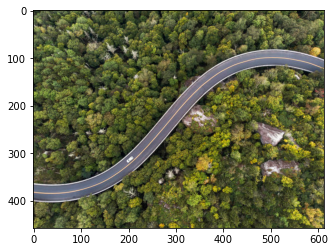

In [2]:
# read an image
image_color = mpimg.imread("Highway.jpg")
# Let's see how the image looks like
plt.imshow(image_color)
plt.show()

In [3]:
print('Shape of the image: ',image_color.shape)

Shape of the image:  (458, 612, 3)


In [4]:
# This is a 3-d array of pixel color info, in BGR format
print(image_color)
print("Image Properties")
print("-> Number of Pixels: " + str(image_color.size))
print("-> Shape/Dimensions: " + str(image_color.shape))

[[[ 84  98  63]
  [ 90 106  59]
  [114 135  70]
  ...
  [125 147  64]
  [129 152  64]
  [174 195 104]]

 [[ 68  79  47]
  [ 64  78  42]
  [ 83  99  54]
  ...
  [120 149  65]
  [120 150  64]
  [138 166  79]]

 [[ 65  77  41]
  [ 41  52  22]
  [ 34  46  22]
  ...
  [123 158  78]
  [126 159  80]
  [114 145  67]]

 ...

 [[130 131  61]
  [154 157  76]
  [137 141  56]
  ...
  [ 82  84  47]
  [ 85  91  53]
  [ 86  96  61]]

 [[158 164  56]
  [131 132  62]
  [113 114  48]
  ...
  [ 92  84  48]
  [ 77  73  48]
  [ 80  83  56]]

 [[174 180  72]
  [148 149  79]
  [132 133  67]
  ...
  [ 91  83  47]
  [ 75  71  46]
  [ 78  81  54]]]
Image Properties
-> Number of Pixels: 840888
-> Shape/Dimensions: (458, 612, 3)


# Playing image with colours
1. change to **grayscale**
2. change **blue to red** and **red to blue**

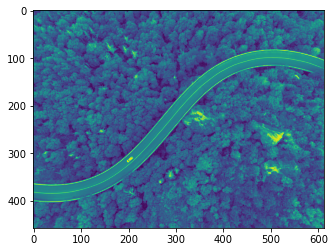

In [5]:
# convert image to grayscale
image_gray = cv2.cvtColor(image_color,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray);
#image_gray.shape

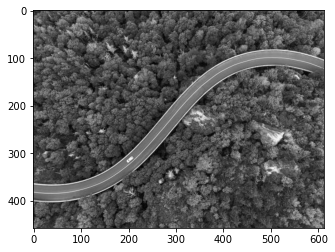

In [6]:
# have to convert grayscale back to RGB for plt.imshow(), since plt.imshow expects a 3d array
# try plotting the same directly with image_gray and see the result for yourself 
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))

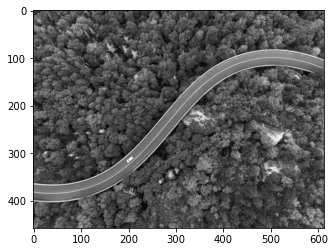

In [7]:
# Aliter method to convert to gray scale
plt.imshow(image_gray,cmap='gray');

In [8]:
print('Gray scale shape of image: ', image_gray.shape)

Gray scale shape of image:  (458, 612)


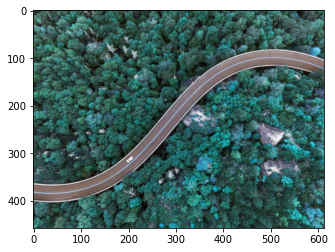

In [9]:
# convert image to RGB color for matplotlib
image_RGB = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(image_RGB)

# Let's sort out the white color out of the image

In [10]:
# copying the same gray scale image to another variable
image_copy = np.copy(image_gray)
image_copy.shape

(458, 612)

In [11]:
# for any value that is not white color on gray image 
image_copy[ (image_copy[:,:] < 170) ] = 0 

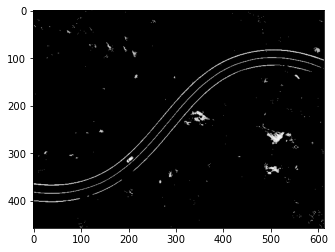

In [12]:
# Display the image
plt.imshow(image_copy, cmap = 'gray')
plt.show()

In [13]:
# copying the same original RGB scale image to another variable
image_copy_RGB = np.copy(image_color)
image_copy_RGB.shape

(458, 612, 3)

In [14]:
# for any that is not white color on RGB image
image_copy_RGB[ (image_copy_RGB[:,:,0] < 200) | (image_copy_RGB[:,:,1] < 200) |
           (image_copy_RGB[:,:,2] < 200) ] = 0 

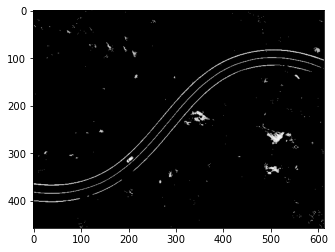

In [15]:
# Display the image
plt.imshow(image_copy, cmap = 'gray')
plt.show()

In [16]:
cv2.imshow('Original Image', image_color)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
height, width, channels = image_color.shape # on original image
print("channels: ", channels)

channels:  3


In [18]:
height, width = image_color.shape[:2] # getting first two parameters - height & width
print("height: ", height)
print("Width: ", width)

height:  458
Width:  612


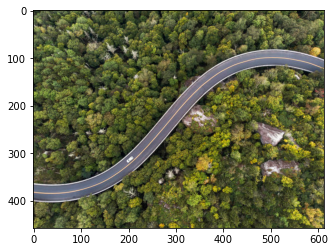

In [19]:
plt.imshow(image_color);

In [20]:
image_color.shape

(458, 612, 3)

# Perform region of interest masking

In [21]:
# Select points of the region of interest (ROI)
ROI = np.array([[(0, height),(0,410),(0,358),(20,360),(100,360),(150,340),(200,300),(300,180),(400,100),(500,77),(width,97),
                 (610,150),(580,130),(520,120),(450,125),(400,150),(320,220),(220,335),(200,350),(180,360),
                 (150,380),(100,400),(0,405),(0,width),(width, height)]], dtype=np.int32)    
 


In [22]:
# define a blank image with all zeros (ie: black) 
blank = np.zeros_like(image_gray)  
blank

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
blank.shape # same shape as in gray scale image

(458, 612)

In [24]:
# Fill the Region of interest with white color (ie: 255)!
mask = cv2.fillPoly(blank, ROI, 255)

# Perform bitwise AND operation to select only the region of interest
masked_image = cv2.bitwise_and(image_gray, mask)

In [25]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

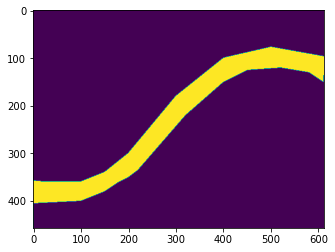

In [26]:
plt.imshow(mask)

In [27]:
masked_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [110,   0,   0, ...,   0,   0,   0],
       [131,   0,   0, ...,   0,   0,   0],
       [147,   0,   0, ...,   0,   0,   0]], dtype=uint8)

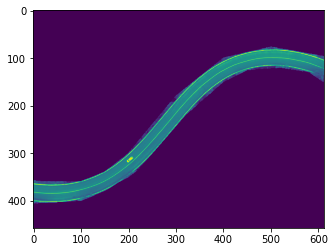

In [28]:
plt.imshow(masked_image)

In [29]:
masked_image.shape # same shape 

(458, 612)

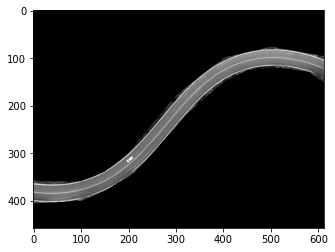

In [30]:
plt.imshow(masked_image, cmap = 'gray')

Color image
(195, 259, 3)


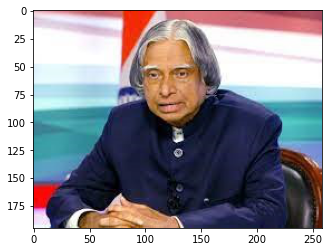

gray image
(195, 259)


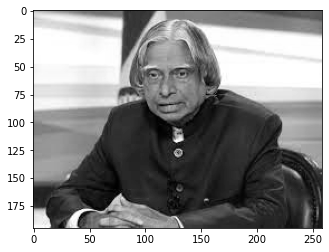

In [31]:
# read an image
image_kalam = mpimg.imread("kalam.jpg")
# Let's see how the image looks like
print('Color image')
print(image_kalam.shape)
plt.imshow(image_kalam)
plt.show()

image_kalam_gray = cv2.cvtColor(image_kalam,cv2.COLOR_BGR2GRAY)
print('gray image')
plt.imshow(image_kalam_gray,cmap='gray');
print(image_kalam_gray.shape)

Horizontal Flip


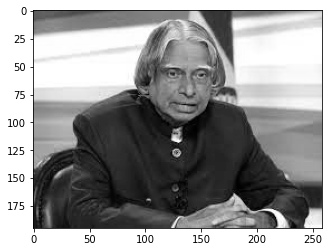

In [32]:
# Horizontal flip

flip_img = cv2.flip(image_kalam_gray, 1)
print('Horizontal Flip')
plt.imshow(flip_img, cmap='gray')
plt.show()

Vertical Flip


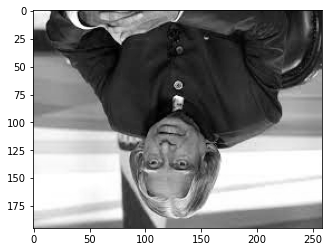

In [33]:
# Vertical flip

flip_img = cv2.flip(image_kalam_gray, 0)
print('Vertical Flip')
plt.imshow(flip_img, cmap='gray')
plt.show()

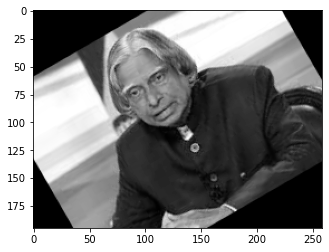

In [34]:
h, w = image_kalam_gray.shape
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), 30, 1)
rotated_img = cv2.warpAffine(image_kalam_gray, M, (w, h))
plt.imshow(rotated_img, cmap='gray')
plt.show()

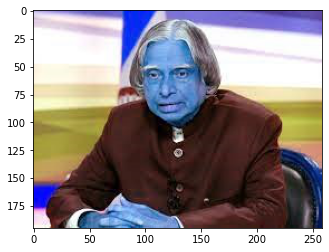

In [35]:
# convert image to RGB color for matplotlib
image_RGB = cv2.cvtColor(image_kalam, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(image_RGB)
plt.show()

# Negative image

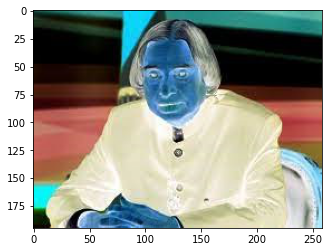

In [36]:
B,G,R = cv2.split(image_kalam)
B[:] = [255-x for x in B]     #inverting blue
G[:] = [255-x for x in G]     #inverting green    
R[:] = [255-x for x in R]     #inverting red

#saving image
neg_img = cv2.merge((B, G, R)) 
plt.imshow(neg_img)


In [37]:
B,G,R = cv2.split(image_kalam)
B

array([[207, 206, 205, ..., 162, 162, 162],
       [226, 225, 224, ..., 162, 162, 162],
       [241, 240, 241, ..., 162, 162, 162],
       ...,
       [247, 247, 246, ...,  85,  85,  85],
       [247, 247, 246, ...,  85,  85,  85],
       [247, 247, 246, ...,  85,  85,  85]], dtype=uint8)

In [38]:
G

array([[164, 163, 160, ...,  75,  75,  75],
       [186, 185, 183, ...,  75,  75,  75],
       [208, 207, 206, ...,  75,  75,  75],
       ...,
       [252, 251, 248, ...,  23,  23,  23],
       [252, 251, 249, ...,  23,  23,  23],
       [252, 251, 249, ...,  23,  23,  23]], dtype=uint8)

In [39]:
R

array([[171, 170, 167, ...,  92,  92,  92],
       [194, 193, 191, ...,  92,  92,  92],
       [215, 214, 213, ...,  94,  94,  94],
       ...,
       [246, 254, 255, ...,   2,   2,   2],
       [246, 254, 255, ...,   2,   2,   2],
       [246, 254, 255, ...,   2,   2,   2]], dtype=uint8)